In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y


def setup_shi(yn,xn,return_model=False,num_params=4):
    x1n,x2n = xn[:,0],xn[:,1:num_params]
    
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    
    model1_deriv = OLS_loglike(yn,sm.add_constant(x1n))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    params2 = (model2_fit.params)
    
    model2_deriv = OLS_loglike(yn,sm.add_constant(x2n))
    ll2 = model2_deriv.loglikeobs(model2_fit.params)
    grad2 =  model2_deriv.score_obs(model2_fit.params)    
    hess2 = model2_deriv.hessian(model2_fit.params)
    
    if return_model:
        return ll1,grad1,hess1,params1,model1,ll2,grad2,hess2,params2,model2
    return ll1,grad1,hess1,params1,ll2,grad2,hess2,params2

def gen_data(nobs=1000, a=0.25, num_params=4):
    x = np.random.normal(scale=3., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params].sum(axis=1) + e
    return y,x,nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn,return_model=False,num_params=15)

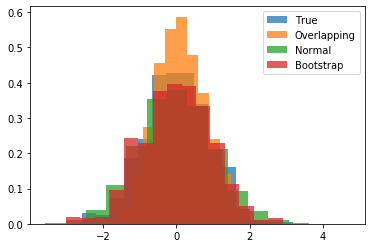

In [20]:
import vuong_plots
#true_stats = vuong_plots.plot_true(gen_data,setup_shi)

def gen_data(nobs=1000, a=0.25, num_params=19):
    x = np.random.normal(scale=3., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params].sum(axis=1) + e
    return y,x,nobs

true_stats = vuong_plots.plot_true2(gen_data,setup_shi,trials=500)
yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap_pt(yn,xn,nobs,setup_shi,trials=500)

plt.legend()
plt.savefig('../figs/shi_plot25019.png')
plt.show()

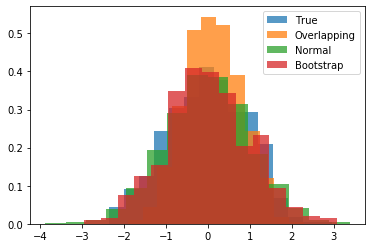

In [21]:
yn,xn,nobs = gen_data(nobs=1000, a=0.00, num_params=19)
true_stats = vuong_plots.plot_true2(gen_data,setup_shi,trials=500)
yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap_pt(yn,xn,nobs,setup_shi,trials=500)

plt.legend()
plt.savefig('../figs/shi_plot00019.png')
plt.show()

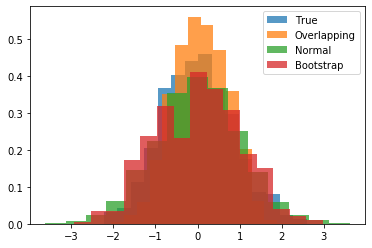

In [22]:
yn,xn,nobs = gen_data(nobs=1000, a=0.25, num_params=9)
true_stats = vuong_plots.plot_true2(gen_data,setup_shi,trials=500)
yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap_pt(yn,xn,nobs,setup_shi,trials=500)

plt.legend()
plt.savefig('../figs/shi_plot2509.png')
plt.show()

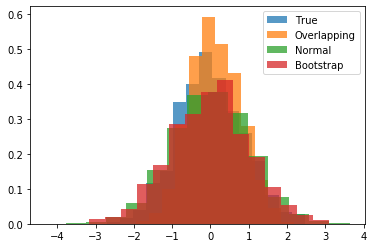

In [23]:
yn,xn,nobs = gen_data(nobs=1000, a=0.00, num_params=9)
true_stats = vuong_plots.plot_true2(gen_data,setup_shi,trials=500)
yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap_pt(yn,xn,nobs,setup_shi,trials=500)

plt.legend()
plt.savefig('../figs/shi_plot0009.png')
plt.show()

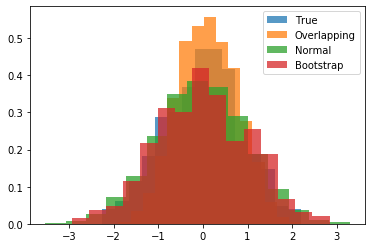

In [24]:
yn,xn,nobs = gen_data(nobs=1000, a=0.00, num_params=4)
true_stats = vuong_plots.plot_true2(gen_data,setup_shi,trials=500)
yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap_pt(yn,xn,nobs,setup_shi,trials=500)

plt.legend()
plt.savefig('../figs/shi_plot0004.png')
plt.show()

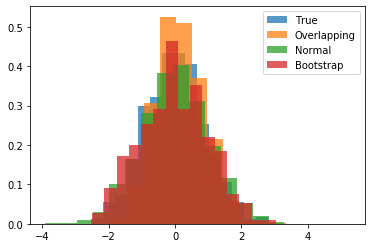

In [25]:
yn,xn,nobs = gen_data(nobs=1000, a=0.25, num_params=4)
true_stats = vuong_plots.plot_true2(gen_data,setup_shi,trials=500)
yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap_pt(yn,xn,nobs,setup_shi,trials=500)

plt.legend()
plt.savefig('../figs/shi_plot2504.png')
plt.show()